In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import json


# Alzheimer

In [ ]:
alz_classif = pd.read_csv('best_metrics_mlflow_alzheimer_ae_then_classifier_20_518544190099611502_values.csv')
for name in ['valid/mcc', 'test/mcc', 'valid/acc', 'test/acc']:
    tmp = [alz_classif[name][m].split('[')[1:][0].split(']')[0].split(',') for m in range(len(alz_classif[name]))]
    tmp = [[float(xx) for xx in x] for x in tmp]
    alz_classif[name] = tmp


In [6]:
import os
os.listdir('best_params_inputs_RF.json')

FileNotFoundError: [Errno 2] No such file or directory: 'best_params_inputs_RF.json'

In [1]:
best_classif = {x: None for x in ['raw', 'minmax', 'minmax_per_batch', 'standard', 'standard_per_batch', 'robust', 'robust_per_batch', 'combat', 'pycombat']}
best_models = {x: None for x in ['raw', 'minmax', 'minmax_per_batch', 'standard', 'standard_per_batch', 'robust', 'robust_per_batch', 'combat', 'pycombat']}
for k in list(best_classif.keys()):
    with open(f"../results/unique_genes/{k}/linsvc/2/saved_models/best_params_inputs_RF.json") as f:
        amide_ml_classif_linsvc = json.load(f)
    # with open(f"../results/unique_genes/{k}/rfc/2/saved_models/best_params_inputs_rfc.json") as f:
    #     amide_ml_classif_rfc = json.load(f)
    # if amide_ml_classif_linsvc['valid_mcc_mean'] > amide_ml_classif_rfc['valid_mcc_mean']:
    best_classif[k] = amide_ml_classif_linsvc
    best_models[k] = "linsvc"
    # elif amide_ml_classif_rfc['valid_mcc_mean'] > amide_ml_classif_linsvc['valid_mcc_mean']:
    #     best_classif[k] = amide_ml_classif_rfc
    #     best_models[k] = "rfc"
    # else:
    #     print("Problem!")
best_classif

NameError: name 'json' is not defined

In [22]:
# alz_classif

In [23]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    "mcc": pd.concat((alz_classif['valid/mcc'], alz_classif['test/mcc'])),
    "models": pd.concat((alz_classif['model'], alz_classif['model'])),
    "group": ['valid' for _ in range(len(alz_classif['model']))] + ['test' for _ in range(len(alz_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": alz_classif['valid/mcc'],
    # "sd" : alz_classif['valid/mcc_std'],
    "models": alz_classif['model'],
    "group": ['valid' for _ in range(len(alz_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": alz_classif['test/mcc'],
    # "sd" : alz_classif['test/mcc_std'],
    "models": alz_classif['model'],
    "group": ['test' for _ in range(len(alz_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

df = df.reset_index()
df = df.drop('index', 1)
df_valid = df_valid.reset_index()
df_valid = df_valid.drop('index', 1)
df_test = df_test.reset_index()
df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['mcc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['mcc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['mcc', 'models', 'group'])

df.loc[:, 'mcc'] = [float(x) for x in df.loc[:, 'mcc']]
df_valid.loc[:, 'mcc'] = [float(x) for x in df_valid.loc[:, 'mcc']]
df_test.loc[:, 'mcc'] = [float(x) for x in df_test.loc[:, 'mcc']]


/tmp/ipykernel_34371/2261320340.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('index', 1)
/tmp/ipykernel_34371/2261320340.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_valid = df_valid.drop('index', 1)
/tmp/ipykernel_34371/2261320340.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test = df_test.drop('index', 1)


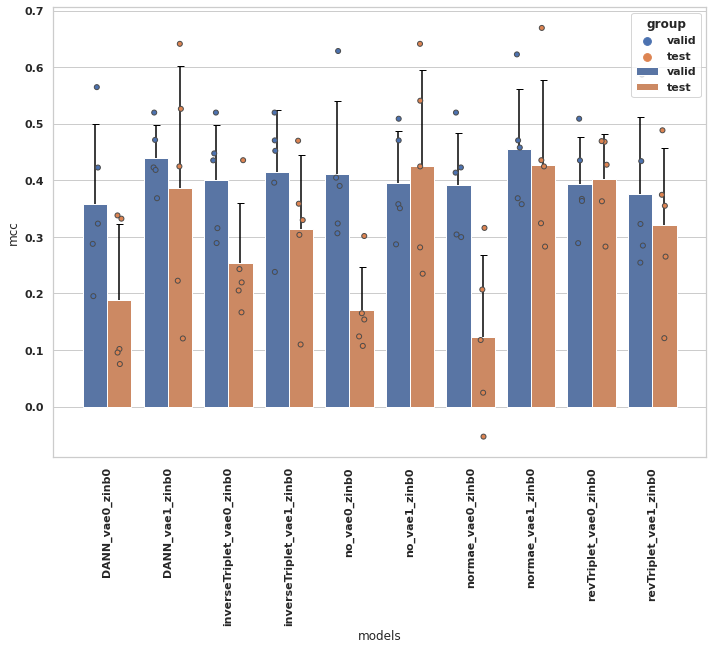

In [24]:
N = len(alz_classif['model'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="mcc", data=df, ci=None, hue='group')
g = sns.stripplot(
    x="models", 
    y="mcc", 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.set_xticklabels(rotation=90, labels=np.unique(df_valid['models']))

plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_valid.groupby(['models'])['mcc'].mean(), lolims=lolims,
            yerr=df_valid.groupby(['models'])['mcc'].std(), fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_test.groupby(['models'])['mcc'].mean(), lolims=lolims,
            yerr=df_test.groupby(['models'])['mcc'].std(), fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
plt.show()

In [25]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "acc": pd.concat((alz_classif['valid/acc'], alz_classif['test/acc'])),
    # "sd" : pd.concat((alz_classif['valid/mcc_std'], alz_classif['test/mcc_std'])),
    "models": pd.concat((alz_classif['model'], alz_classif['model'])),
    "group": ['valid' for _ in range(len(alz_classif['model']))] + ['test' for _ in range(len(alz_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "acc": alz_classif['valid/acc'],
    "models": alz_classif['model'],
    "group": ['valid' for _ in range(len(alz_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "acc": alz_classif['test/acc'],
    "models": alz_classif['model'],
    "group": ['test' for _ in range(len(alz_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

df = df.reset_index()
df = df.drop('index', 1)
df_valid = df_valid.reset_index()
df_valid = df_valid.drop('index', 1)
df_test = df_test.reset_index()
df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['acc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['acc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['acc', 'models', 'group'])

df.loc[:, 'acc'] = [float(x) for x in df.loc[:, 'acc']]
df_valid.loc[:, 'acc'] = [float(x) for x in df_valid.loc[:, 'acc']]
df_test.loc[:, 'acc'] = [float(x) for x in df_test.loc[:, 'acc']]


/tmp/ipykernel_34371/3334156534.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('index', 1)
/tmp/ipykernel_34371/3334156534.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_valid = df_valid.drop('index', 1)
/tmp/ipykernel_34371/3334156534.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test = df_test.drop('index', 1)


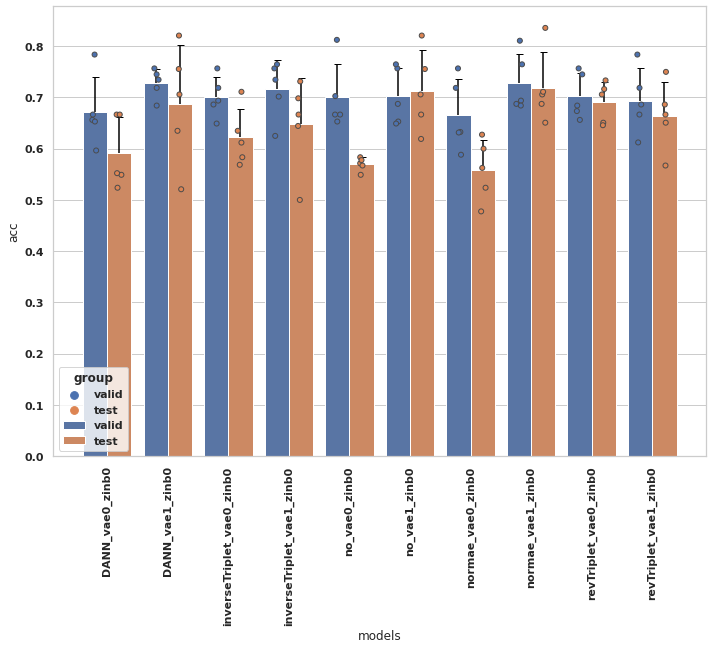

In [26]:
N = len(alz_classif['model'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="acc", data=df, ci=None, hue='group')
g = sns.stripplot(
    x="models", 
    y="acc", 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.set_xticklabels(rotation=90, labels=np.unique(df_valid['models']))

plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_valid.groupby(['models'])['acc'].mean(), lolims=lolims,
            yerr=df_valid.groupby(['models'])['acc'].std(), fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_test.groupby(['models'])['acc'].mean(), lolims=lolims,
            yerr=df_test.groupby(['models'])['acc'].std(), fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
plt.show()

# Adenocarcinoma

In [10]:
import os
os.listdir("../results/amide/raw/linsvc/0/saved_models/")

['best_params_inputs_RF.json', 'best_params_inputs_RF_values.json']

In [12]:
best_classif = {x: None for x in ['raw', 'minmax', 'minmax_per_batch', 'standard', 'standard_per_batch', 'robust', 'robust_per_batch', 'combat', 'pycombat']}
best_models = {x: None for x in ['raw', 'minmax', 'minmax_per_batch', 'standard', 'standard_per_batch', 'robust', 'robust_per_batch', 'combat', 'pycombat']}
for k in list(best_classif.keys()):
    with open(f"../results/amide/{k}/linsvc/0/saved_models/best_params_inputs_RF_values.json") as f:
        amide_ml_classif_linsvc = json.load(f)
    # with open(f"../results/unique_genes/{k}/rfc/2/saved_models/best_params_inputs_rfc.json") as f:
    #     amide_ml_classif_rfc = json.load(f)
    # if amide_ml_classif_linsvc['valid_mcc_mean'] > amide_ml_classif_rfc['valid_mcc_mean']:
    best_classif[k] = amide_ml_classif_linsvc
    best_models[k] = "linsvc"
    # elif amide_ml_classif_rfc['valid_mcc_mean'] > amide_ml_classif_linsvc['valid_mcc_mean']:
    #     best_classif[k] = amide_ml_classif_rfc
    #     best_models[k] = "rfc"
    # else:
    #     print("Problem!")
best_classif

{'raw': {'train_acc': [0.984375, 1.0, 0.6354166666666666],
  'valid_acc': [0.8802083333333334, 0.8697916666666666, 0.5104166666666666],
  'test_acc': [0.875, 0.875, 0.5760869565217391],
  'train_mcc': [0.9271726499455307, 1.0, 0.38592249249397986],
  'valid_mcc': [0.19143984606054681,
   -0.027348549437220974,
   0.1264279082482028],
  'test_mcc': [0.0, 0.0, 0.1931932871352859]},
 'minmax': {'train_acc': [0.9427083333333334,
   0.9782608695652174,
   0.9427083333333334],
  'valid_acc': [0.8854166666666666, 0.765625, 0.8854166666666666],
  'test_acc': [0.8641304347826086, 0.8697916666666666, 0.8641304347826086],
  'train_mcc': [0.80051004149268, 0.9114207758701964, 0.80051004149268],
  'valid_mcc': [0.27565892320998564, 0.26097139411489906, 0.27565892320998564],
  'test_mcc': [0.11565525051480624,
   -0.027348549437220974,
   0.11565525051480624]},
 'minmax_per_batch': {'train_acc': [0.9375,
   0.9130434782608695,
   0.9010416666666666],
  'valid_acc': [0.8854166666666666, 0.86979166666

In [13]:
amide_classif = pd.read_csv('best_metrics_mlflow_amide_ae_classifier_20_223790360739349830_values.csv')
for name in ['valid/mcc', 'test/mcc', 'valid/acc', 'test/acc']:
    tmp = [amide_classif[name][m].split('[')[1:][0].split(']')[0].split(',') for m in range(len(amide_classif[name]))]
    tmp = [[float(xx) for xx in x] for x in tmp]
    amide_classif[name] = tmp


FileNotFoundError: [Errno 2] No such file or directory: 'best_metrics_mlflow_amide_ae_classifier_20_223790360739349830_values.csv'

In [ ]:
pd.concat((amide_classif['valid/mcc'], amide_classif['test/mcc']))

In [32]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    "mcc": pd.concat((amide_classif['valid/mcc'], amide_classif['test/mcc'])),
    "models": pd.concat((amide_classif['model'], amide_classif['model'])),
    "group": ['valid' for _ in range(len(amide_classif['model']))] + ['test' for _ in range(len(amide_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": amide_classif['valid/mcc'],
    # "sd" : amide_classif['valid/mcc_std'],
    "models": amide_classif['model'],
    "group": ['valid' for _ in range(len(amide_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": amide_classif['test/mcc'],
    # "sd" : amide_classif['test/mcc_std'],
    "models": amide_classif['model'],
    "group": ['test' for _ in range(len(amide_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

df = df.reset_index()
df = df.drop('index', 1)
df_valid = df_valid.reset_index()
df_valid = df_valid.drop('index', 1)
df_test = df_test.reset_index()
df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['mcc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['mcc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['mcc', 'models', 'group'])

df.loc[:, 'mcc'] = [float(x) for x in df.loc[:, 'mcc']]
df_valid.loc[:, 'mcc'] = [float(x) for x in df_valid.loc[:, 'mcc']]
df_test.loc[:, 'mcc'] = [float(x) for x in df_test.loc[:, 'mcc']]


/tmp/ipykernel_34371/1296367090.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('index', 1)
/tmp/ipykernel_34371/1296367090.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_valid = df_valid.drop('index', 1)
/tmp/ipykernel_34371/1296367090.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test = df_test.drop('index', 1)


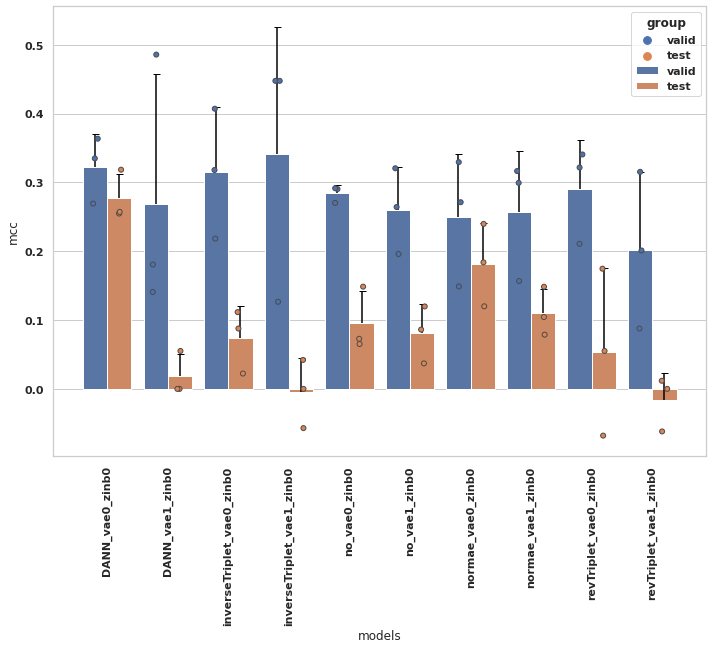

In [33]:
N = len(amide_classif['model'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="mcc", data=df, ci=None, hue='group')
g = sns.stripplot(
    x="models", 
    y="mcc", 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.set_xticklabels(rotation=90, labels=np.unique(df_valid['models']))

plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_valid.groupby(['models'])['mcc'].mean(), lolims=lolims,
            yerr=df_valid.groupby(['models'])['mcc'].std(), fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_test.groupby(['models'])['mcc'].mean(), lolims=lolims,
            yerr=df_test.groupby(['models'])['mcc'].std(), fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
plt.show()

In [37]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "acc": pd.concat((amide_classif['valid/acc'], amide_classif['test/acc'])),
    # "sd" : pd.concat((amide_classif['valid/mcc_std'], amide_classif['test/mcc_std'])),
    "models": pd.concat((amide_classif['model'], amide_classif['model'])),
    "group": ['valid' for _ in range(len(amide_classif['model']))] + ['test' for _ in range(len(amide_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "acc": amide_classif['valid/acc'],
    "models": amide_classif['model'],
    "group": ['valid' for _ in range(len(amide_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "acc": amide_classif['test/acc'],
    "models": amide_classif['model'],
    "group": ['test' for _ in range(len(amide_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

df = df.reset_index()
df = df.drop('index', 1)
df_valid = df_valid.reset_index()
df_valid = df_valid.drop('index', 1)
df_test = df_test.reset_index()
df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['acc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['acc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['acc', 'models', 'group'])

df.loc[:, 'acc'] = [float(x) for x in df.loc[:, 'acc']]
df_valid.loc[:, 'acc'] = [float(x) for x in df_valid.loc[:, 'acc']]
df_test.loc[:, 'acc'] = [float(x) for x in df_test.loc[:, 'acc']]


/tmp/ipykernel_4068/506363535.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('index', 1)
/tmp/ipykernel_4068/506363535.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_valid = df_valid.drop('index', 1)
/tmp/ipykernel_4068/506363535.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test = df_test.drop('index', 1)


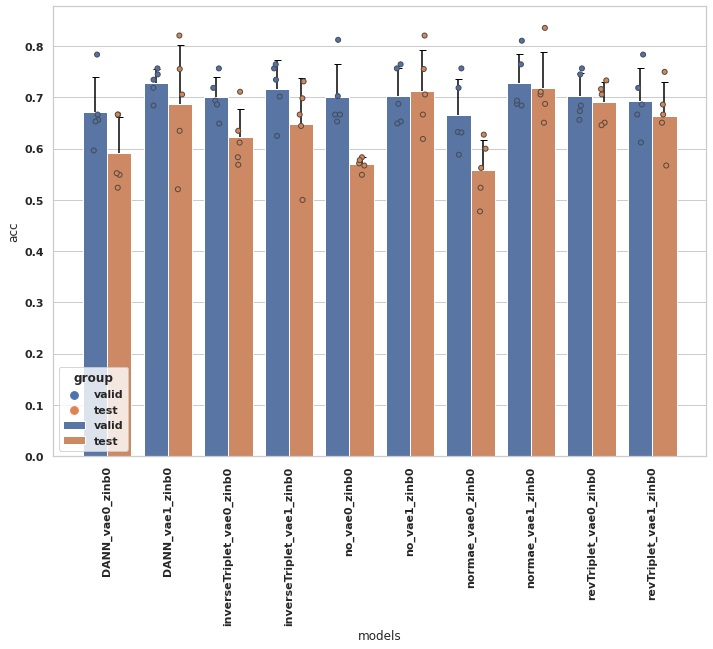

In [38]:
N = len(amide_classif['model'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="acc", data=df, ci=None, hue='group')
g = sns.stripplot(
    x="models", 
    y="acc", 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.set_xticklabels(rotation=90, labels=np.unique(df_valid['models']))

plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_valid.groupby(['models'])['acc'].mean(), lolims=lolims,
            yerr=df_valid.groupby(['models'])['acc'].std(), fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_test.groupby(['models'])['acc'].mean(), lolims=lolims,
            yerr=df_test.groupby(['models'])['acc'].std(), fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
plt.show()

# Mice

In [14]:
ae_classif = pd.read_excel('summary_results.xlsx', sheet_name='mice classif')

In [15]:
amide_classif

,model name,valid/mcc_mean,valid/mcc_std,test/mcc_mean,test/mcc_std,valid/acc_mean,valid/acc_std,test/acc_mean,test/acc_std
0,raw,0.920000,0.060000,0.920000,0.050000,0.960000,0.030000,0.970000,0.020000
1,minmax,0.940000,0.030000,0.920000,0.050000,0.970000,0.030000,0.960000,0.020000
2,minmax_per_batch,0.930000,0.050000,0.870000,0.090000,0.970000,0.020000,0.940000,0.090000
3,standard,0.920000,0.050000,0.910000,0.050000,0.960000,0.030000,0.960000,0.020000
4,standard_per_batch,0.920000,0.050000,0.880000,0.100000,0.960000,0.030000,0.950000,0.040000
5,robust,0.890000,0.050000,0.940000,0.080000,0.950000,0.030000,0.970000,0.040000
6,robust_per_batch,0.830000,0.040000,0.770000,0.140000,0.920000,0.020000,0.880000,0.080000
7,combat,0.050000,0.170000,0.130000,0.160000,0.510000,0.050000,0.580000,0.090000
8,pycombat,0.920000,0.060000,0.900000,0.080000,0.960000,0.030000,0.960000,0.030000
9,harmony,0.130000,0.080000,0.100000,0.040000,0.570000,0.050000,0.570000,0.030000


In [16]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "mcc": pd.concat((amide_classif['valid/mcc_mean'], amide_classif['test/mcc_mean'])),
    "sd" : pd.concat((amide_classif['valid/mcc_std'], amide_classif['test/mcc_std'])),
    "models": pd.concat((amide_classif['model name'], amide_classif['model name'])),
    "group": ['valid' for _ in range(len(amide_classif['model name']))] + ['test' for _ in range(len(amide_classif['model name']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": amide_classif['valid/mcc_mean'],
    "sd" : amide_classif['valid/mcc_std'],
    "models": amide_classif['model name'],
    "group": ['valid' for _ in range(len(amide_classif['model name']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": amide_classif['test/mcc_mean'],
    "sd" : amide_classif['test/mcc_std'],
    "models": amide_classif['model name'],
    "group": ['test' for _ in range(len(amide_classif['model name']))]
})


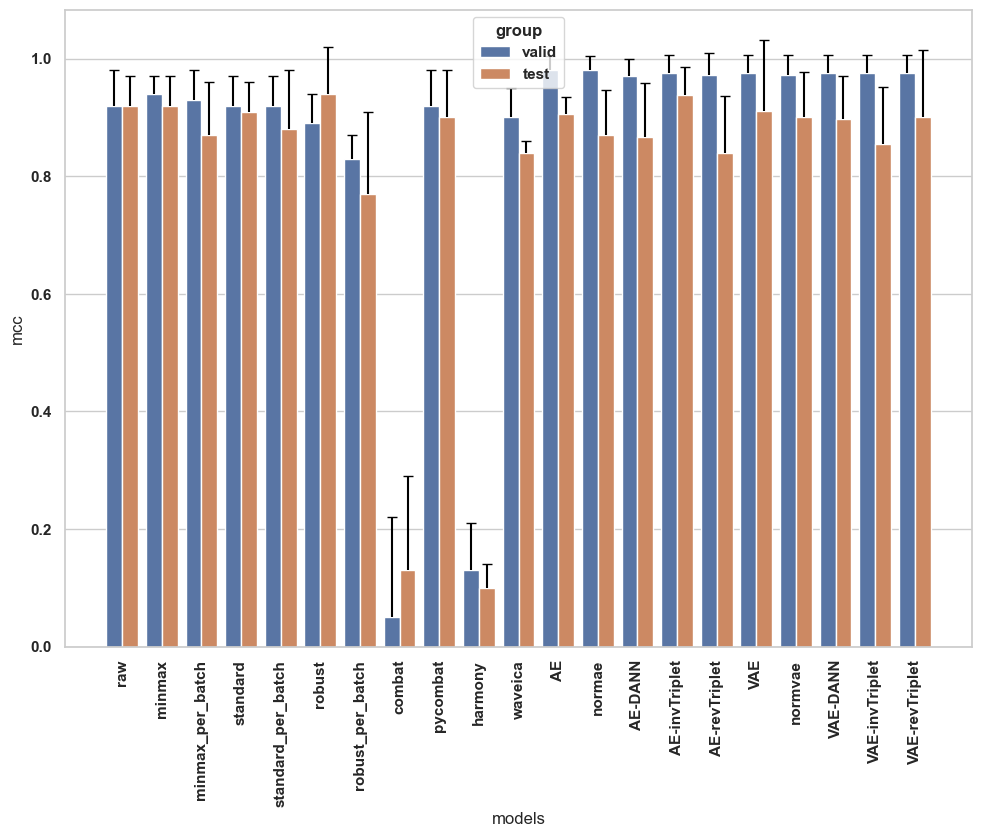

In [17]:
N = len(amide_classif['model name'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="mcc", data=df, ci=None, hue='group',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=df_valid['models'])

lolims = [True if v > 0 else False for v in df_valid['mcc']]
uplims = [True if v < 0 else False for v in df_valid['mcc']]
plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_valid['mcc'], lolims=lolims, uplims=uplims,
            yerr=df_valid['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
lolims = [True if v > 0 else False for v in df_test['mcc']]
uplims = [True if v < 0 else False for v in df_test['mcc']]
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_test['mcc'], lolims=lolims, uplims=uplims,
            yerr=df_test['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
plt.show()

In [18]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "acc": pd.concat((amide_classif['valid/acc_mean'], amide_classif['test/acc_mean'])),
    "sd" : pd.concat((amide_classif['valid/acc_std'], amide_classif['test/acc_std'])),
    "models": pd.concat((amide_classif['model name'], amide_classif['model name'])),
    "group": ['valid' for _ in range(len(amide_classif['model name']))] + ['test' for _ in range(len(amide_classif['model name']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "acc": amide_classif['valid/acc_mean'],
    "sd" : amide_classif['valid/acc_std'],
    "models": amide_classif['model name'],
    "group": ['valid' for _ in range(len(amide_classif['model name']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "acc": amide_classif['test/acc_mean'],
    "sd" : amide_classif['test/acc_std'],
    "models": amide_classif['model name'],
    "group": ['test' for _ in range(len(amide_classif['model name']))]
})


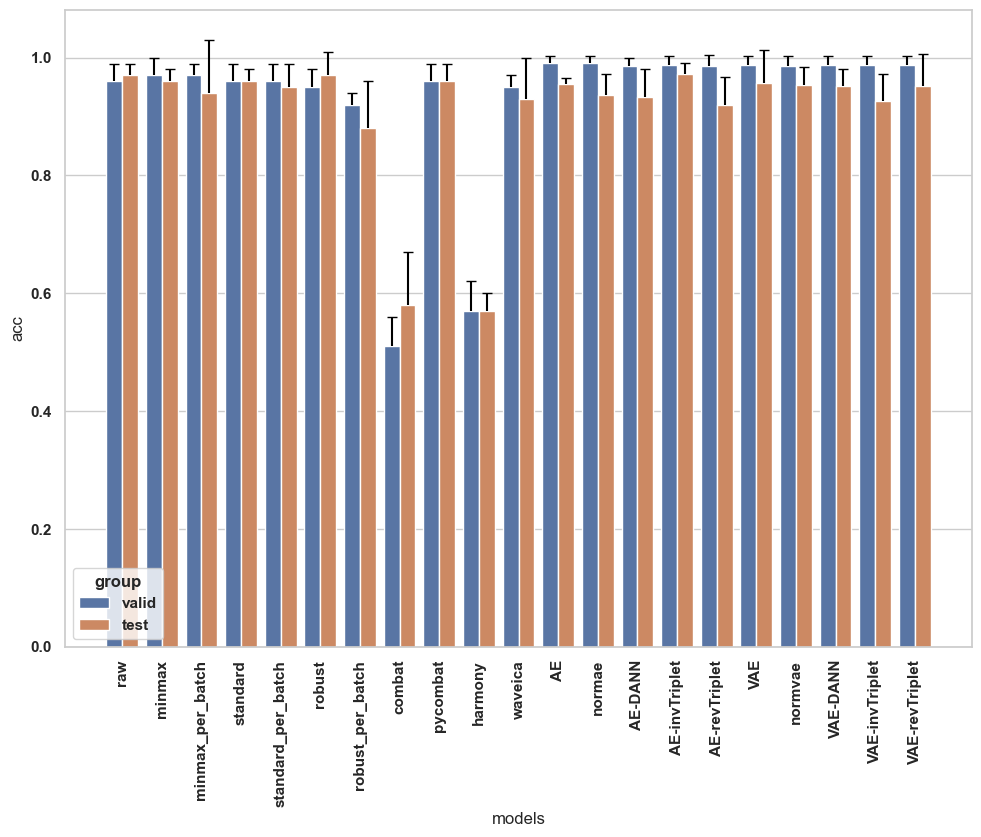

In [19]:
N = len(amide_classif['model name'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="acc", data=df, ci=None, hue='group',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=df_valid['models'])

lolims = [True if v > 0 else False for v in df_valid['acc']]
uplims = [True if v < 0 else False for v in df_valid['acc']]
plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_valid['acc'], lolims=lolims, uplims=uplims,
            yerr=df_valid['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
lolims = [True if v > 0 else False for v in df_test['acc']]
uplims = [True if v < 0 else False for v in df_test['acc']]
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_test['acc'], lolims=lolims, uplims=uplims,
            yerr=df_test['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
plt.show()